# Códigos para realizar Agrupamento
* Kmeans
* Cluster Hierárquico
* GMM
* DBScan

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets

# Gerando base de dados (iris)
* Gerando kmeans com 20 clusters e apenas 1 iteração
* Salvando os centroides para utilzar na inicialização dos demais códigos

In [2]:
iris = datasets.load_iris()

dados = iris.data
y = iris.target

kmeans = KMeans(n_clusters=20, max_iter=1,init='k-means++', n_init=10, random_state=42)
kmeans.fit(dados)

centroides = kmeans.cluster_centers_

# Kmeans

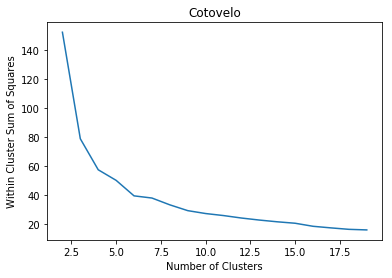

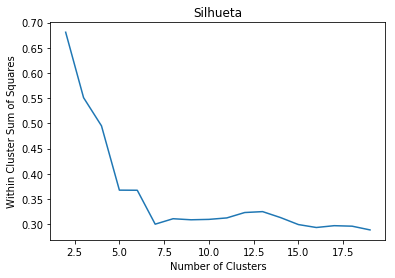

,score_wss,silhueta
2,152.4,0.6808
3,78.9,0.5510
4,57.5,0.4951
5,50.2,0.3675
6,39.5,0.3673
7,38.0,0.3000
8,33.3,0.3108
9,29.3,0.3087
10,27.3,0.3095
11,25.9,0.3124


In [3]:
# Necessário ler os dados e se tiver os centróides iniciais
# Exemplo com centroides iniciais (init)
# Exemplo com numero de iterações definidas (max_iter)
# Exemplo com numero de inicializações definidas (n_init = 10 é o default)


k_values = range(2,20)
first=True
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=10,init=centroides[0:k,:], n_init=1, random_state=42)
    cluster_labels = kmeans.fit_predict(dados)
    score_wss = round(kmeans.inertia_ ,1)
    silhueta = round(silhouette_score(dados, cluster_labels),4)
    resultados_aux = {'score_wss': score_wss, 'silhueta': silhueta}
    resultados_aux = pd.DataFrame(resultados_aux, index = [k])
    if first == True:
        resultados_final = resultados_aux
        first = False
    else:
        resultados_final = pd.concat([resultados_final, resultados_aux],axis =0)
        
plt.plot(resultados_final.index,resultados_final.score_wss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Cotovelo')
plt.show()

plt.plot(resultados_final.index,resultados_final.silhueta)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.title('Silhueta')
plt.show()

resultados_final

In [4]:
# Verificando os centróides finais
# Selecionando 3 clusters

KM_final = KMeans(n_clusters = 3, init = centroides[0:3,:], n_init = 1, max_iter=20, random_state=42)

KM_final.fit(dados)
clusters_labels = KM_final.predict(dados)

print ('Centroides: ', KM_final.cluster_centers_)
#print ('\nInertia ou WCSS: ', KM.inertia_)
#print ('\nClusters preditos: ' ,clusters_labels)

Centroides:  [[ 5.88360656  2.74098361  4.38852459  1.43442623]
 [ 5.006       3.418       1.464       0.244     ]
 [ 6.85384615  3.07692308  5.71538462  2.05384615]]


In [5]:
# Verificando acurácia do agrupamento
# Foi necessário renomear os labels para verificar acurácia corretamente

from sklearn.metrics import  confusion_matrix, accuracy_score

clusters_labels[clusters_labels < 1] = 3
clusters_labels[clusters_labels == 1] = 0
clusters_labels[clusters_labels == 3] = 1

accuracy_score(y, clusters_labels)

0.88666666666666671

# Cluster hierárquico

In [6]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

Z = hierarchy.linkage(dados, 'single')
plt.show()

In [7]:
HC = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             memory=None, 
                             connectivity=None, 
                             compute_full_tree='auto', 
                             linkage='ward', 
                             pooling_func='deprecated')

HC.fit(dados)
cl_labels = HC.fit_predict(dados)
cl_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [8]:
# Verificando acurácia do agrupamento
# Foi necessário renomear os labels para verificar acurácia corretamente

cl_labels[cl_labels < 1] = 3
cl_labels[cl_labels == 1] = 0
cl_labels[cl_labels == 3] = 1


accuracy_score(y, cl_labels)

0.89333333333333331

# GMM

In [9]:
GMM = GaussianMixture(n_components=3, 
                       covariance_type='full', 
                       tol=0.001, 
                       reg_covar=1e-06, 
                       max_iter=100, 
                       n_init=1, 
                       init_params='kmeans', 
                       weights_init=None, 
                       means_init=None, 
                       precisions_init=None, 
                       random_state=None, 
                       warm_start=False, 
                       verbose=0, 
                       verbose_interval=10)

GMM.fit(dados)
clust_labels = GMM.predict(dados)
clust_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
# Verificando acurácia do agrupamento
# Foi necessário renomear os labels para verificar acurácia corretamente

clust_labels[clust_labels < 1] = 3
clust_labels[clust_labels == 1] = 0
clust_labels[clust_labels == 3] = 1


accuracy_score(y, clust_labels)

0.36666666666666664

# DBScan

In [11]:
DB = DBSCAN(eps=0.5, 
            min_samples=5, 
            metric='euclidean', 
            metric_params=None, 
            algorithm='auto', 
            leaf_size=30, 
            p=None, 
            n_jobs=1)

DB.fit(dados)
c_labels = DB.fit_predict(dados)
c_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [12]:
# Verificando acurácia do agrupamento
# Foi necessário renomear os labels para verificar acurácia corretamente

c_labels[c_labels < 0] = 2

accuracy_score(y, c_labels)

0.68666666666666665